# Sputtering Simulation

In [2]:
# Libraries for data
import numpy as np
import pandas as pd

# Libraries for graphs and animation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, PathPatch
from matplotlib.transforms import Affine2D
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.cm as cm

In [3]:
# Visualization format
plt.rcParams.update({'mathtext.default':  'regular' })
sns.set(context='paper',style="whitegrid",font='Times New Roman',font_scale=1.2)

In [4]:
# Magic command for context
%matplotlib notebook

# Energy distribution
### Monte Carlo Method

In [5]:
# Number of points used
points = 100000

# Energy variable as a vector
energy = np.linspace(0,35,points)

# Evaluate the function of energy that has the distribution  
func_energy = 100*energy/(energy+4)**3

# Generate random variables ("a" and "b" corresponding to "energy" and "func_energy")
random_1,random_2 = np.random.uniform(0,max(energy),points), np.random.uniform(0,max(func_energy),points)

<IPython.core.display.Javascript object>


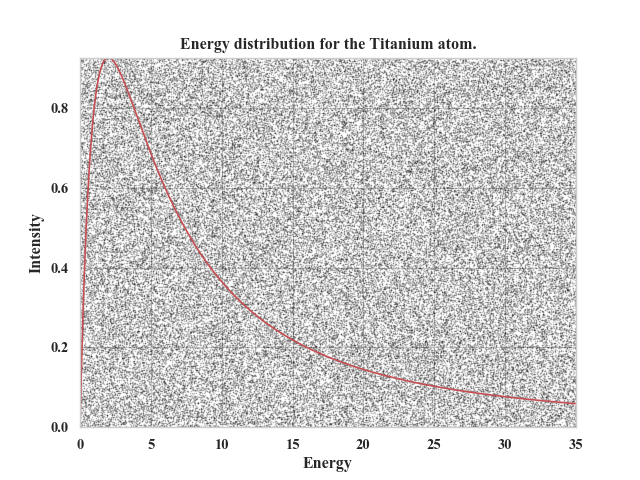

In [6]:
# Create a figure to plot
plt.figure()
plt.xlabel("Energy")
plt.ylabel("Intensity")
plt.title("Energy distribution for the Titanium atom.")
plt.ylim(min(func_energy),max(func_energy))
plt.xlim(min(energy),max(energy))


# Graph of the points 
plt.scatter(random_1,random_2,s=.01, c='k')
plt.plot(energy,func_energy, c='r')
plt.show()

In [7]:
# Histogram Bars
bins = 100
lenght = np.max(energy)/bins

# Bars creation
bars = np.arange(0,35,lenght)+lenght

# Histogram Initialization
histogram = np.zeros(len(bars))

# Histogram generated with the montecarlo conditons
for position in range(len(random_1)):
    flag = False
    if random_2[position]<=100*random_1[position]/(random_1[position]+4)**3:
        flag = True
    for i in range(bins):
        if i == 0:
            if random_1[position] < bars[i] and flag == True:
                histogram[0] += 1
                break
        else:
            if random_1[position] > bars[i-1] and random_1[position] < bars[i] and flag == True:
                histogram[i] += 1
                break

<IPython.core.display.Javascript object>


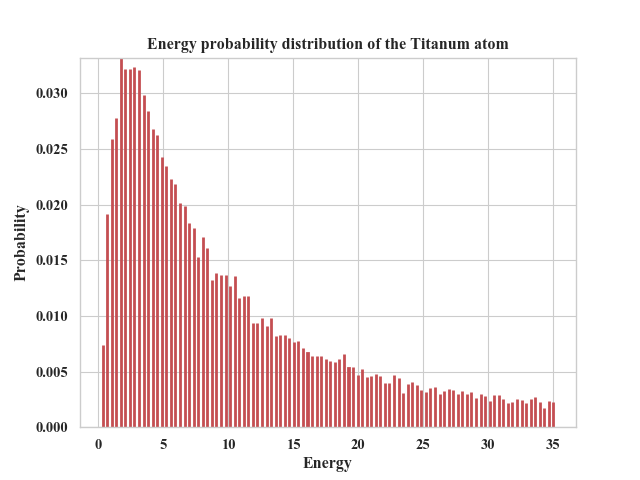

Text(0.5, 1.0, 'Energy probability distribution of the Titanum atom')

In [8]:
# Histogram plotting
plt.figure()
histogram_prob = histogram/histogram.sum()
plt.bar(bars, histogram_prob, width = 0.001, linewidth = 2, edgecolor='r')
plt.ylim(0,max(histogram_prob))

plt.xlabel("Energy")
plt.ylabel("Probability")
plt.title("Energy probability distribution of the Titanum atom")

#### Yield (With probability determines the number of atoms that will be obtained from the sputter proccess considering the Argon Ions)

In [9]:
# Number of Argon Ions
Ar=int(input())

# Yield value
# for a specific case, maintain an unitary yield value
y=1

# Number of used titanium particles are the argon particles times the yield 
Ti=Ar*y

5000


# Eroded atom
###  Determine the primary characteristics of a particle to generate some properties: speed, angle and initial position. 

In [10]:
# Function to generate a particle with an allowed speed and an angle, with initial condition
def create_particle(bars,histogram,lenght,target_min,target_max):
    # To select the value of speed from the histogram
    
    # Boltzmann Constant
    k=1.380648813*10**(-23)
    # Temperature
    t=300
    #Energy of particles
    energyAr=3/2*k*t/(1.6*10**(-19))
    velocity = np.random.choice(bars, p=histogram)*energyAr
    
    # Giving a specific value of the velocity with a uniform distribution
    particle_v = np.random.uniform(low=(velocity-lenght),high=velocity)
    
    #Giving a specific value for the angle from 0 to pi
    particle_a = np.random.uniform(0, np.pi)
    angle = np.random.uniform(0,2*np.pi)
    
    #Defining the initial position of the value which got off from the target
    posx = np.random.uniform(target_min,target_max)
    posy = 0
    posz = np.random.uniform(target_min,target_max)
    
    # Save the three positions of the particle in a vector
    pos = [posx,posy,posz]
    
    # All the information of the particle can be saved in a list
    particle = [particle_v,particle_a,pos, angle]
    return particle

In [12]:
# target
target_min = 3
target_max = 5

# Sustrate
sustrate_min = -5
sustrate_max = 5

#Creation of particles
particlesTi = [create_particle(bars,histogram_prob,
                               lenght,target_min, target_max)
               for i in range(Ti)]
countgood = 0
countbad = 0

#Dimensiones de camara
camxmin = -11
camxmax = 11

camzmin = -11
camzmax = 11

camymin = 0
camymax = 20

# Save Results 
results_x = []
results_y = []
results_z = []
results_c = []
good_values = []

for particle in particlesTi:
    objective=False
    #Definir la posicion
    vectorposx = []
    vectorposy = []
    vectorposz = []

    posx = particle[2][0]
    posy = particle[2][1]
    posz = particle[2][2]

    vectorposx.append(posx)
    vectorposy.append(posy)
    vectorposz.append(posz)
    operations = True


    """ESTE ES EL CAMINO MEDIO DE LAS PARTICULAS PERO NO ESTAMOS TOMANDO EL REAL AUN..."""
    recorrido = .1

    #Determinar si colisiona la particula dependiendo de un valor "tresh" de umbral
    tresh = 1/np.exp(1)


    while operations==True:
        #Determinar si colisiona la particula dependiendo de un valor "tresh" de umbral
        collision = np.random.uniform(0,1)

        if collision < tresh:
            collisiontrue = True
        else: 
            collisiontrue = False

        #Determinar la mecánica de la partícula cuando no colisiona
        if collisiontrue == False:
            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3])
            posy = posy + recorrido*np.sin(particle[1])
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3])
            pos = [posx,posy,posz]

        #Determinar la mecánica de la partícula cuando colisiona
        elif collisiontrue == True:
            
            modificacion = 7*recorrido
            #particle[1]=particle[1]+.7*np.random.uniform(0,2*np.pi)

            posx = posx + recorrido*np.cos(particle[1])*np.cos(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posy = posy + recorrido*np.sin(particle[1]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            posz = posz + recorrido*np.sin(particle[1])*np.sin(particle[3]) + modificacion*np.sin(np.random.uniform(0,2*np.pi))
            pos = [posx,posy,posz]
            
        #Evaluate if the particle is still in the box
        if abs(posx) > camxmax:
            operations = False
        elif abs(posz) > camzmax:
            operations = False
        elif posy < camymin:
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False
        elif (posy >= camymax) and (abs(posx) >= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False    
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) >= sustrate_max):
            operations = False  
        elif (posy >= camymax) and (abs(posx) <= sustrate_max) and (abs(posz) <= sustrate_max):
            operations = False
            objective=True
                
        vectorposx.append(posx)
        vectorposy.append(posy)
        vectorposz.append(posz)
        
        particle[2]=pos
        
    if objective == True:
        color = 'g'
        #Cuenta de particulas que llegan al sustrato
        countgood += 1
        #plt.axes(projection='3d').plot(vectorposx, vectorposz, vectorposy)
    elif objective == False:
        #Cuenta de particulas que no llegan al sustrato
        countbad += 1
        color = 'r'
    good_values.append(countgood)
    #plt.plot(vectorposx,vectorposy,c=color,linewidth=.1)

    # Result vectors
    results_x.append(vectorposx)
    results_y.append(vectorposy)
    results_z.append(vectorposz)
    results_c.append(color)

#plt.xlim(camxmin,camxmax)
#plt.ylim(camymin,camymax)

#plt.axes(projection='3d').plot([-5,5], [20,20],c= 'k', linewidth=10, label="Sustrato")
#plt.plot([blancomin,blancomax] ,[0,0]  ,c= 'g', linewidth=5, label="Blanco")

#plt.xlabel("Position $x$ (cm)")
#plt.ylabel("Position $y$ (cm)")
#plt.title("Simulation of Sputtering Particles Trayectories")

#Cuenta total
counttotal=countgood+countbad
total_particles_sub_hit=countgood/counttotal
print(f"Porcentaje de partículas que incidieron en el sustrato: {total_particles_sub_hit*100}%")

Porcentaje de partículas que incidieron en el sustrato: 1.5%


<IPython.core.display.Javascript object>


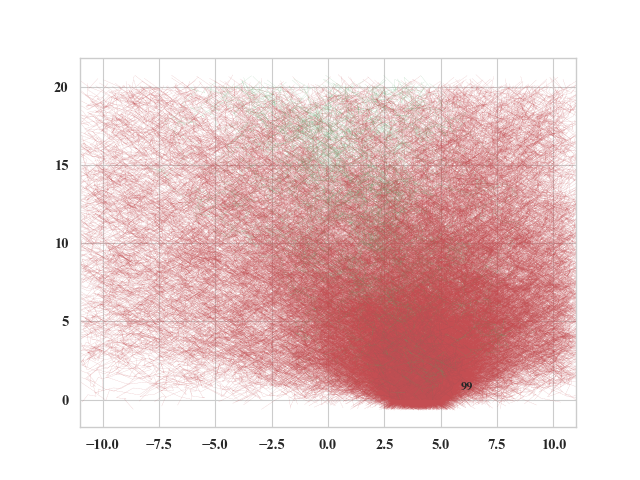

In [13]:
plt.close('all')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim(camxmin,camxmax)
#plt.ylim(camymin,camymax)
text = plt.text(5.9,.58,f' 0', fontsize=9)
#plotter = ax1.plot(results_x[0][:-3],results_y[0][:-3], c='k')


#def a2(i):
#    plotter.set_data(results_x[0][0:i], results_y[0][0:i])


mult = int(Ti/100)
def ani(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    text.set_text(f'{i}')
    for j in range(mult):
        plot = ax.plot(results_x[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, ls='--')

anim = animation.FuncAnimation(fig, ani, frames=int(Ti/mult), repeat=False)

<IPython.core.display.Javascript object>


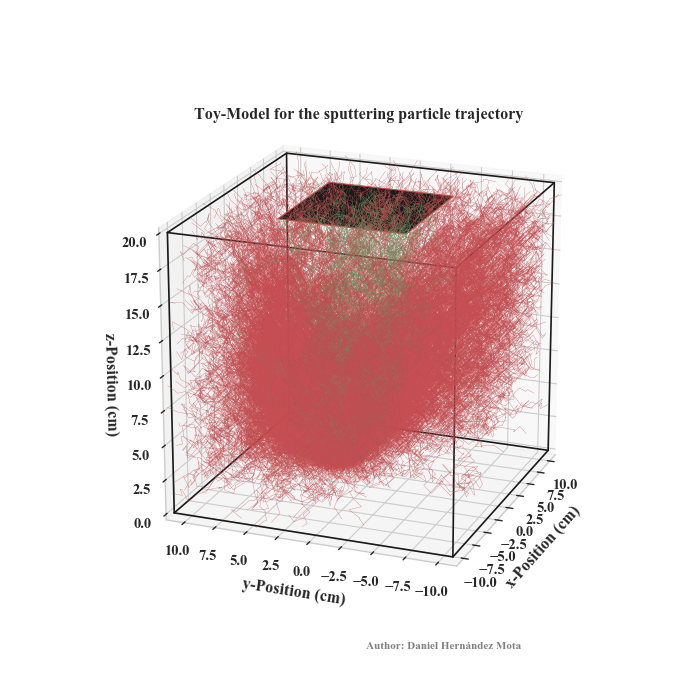

In [31]:
fig3d  = plt.figure(figsize=(7,7))
ax3d = fig3d.add_subplot(111, projection='3d')
plot = ax3d.plot([], [], [])

#Draw the box
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymin,camymin], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmin,camzmin],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmax],[camzmax,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmax],[camymax,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmin,camzmin],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmin,camxmin],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)
ax3d.plot([camxmax,camxmax],[camzmax,camzmax],[camymin,camymax], c='k', zorder=1)

#Text
ax3d.text(0,0,camymin-13, f'Author: Daniel Hernández Mota', fontsize = 8, color='gray')

# Set the box limits
ax3d.set_ylim(camzmax,camzmin,)
ax3d.set_zlim(camymin,camymax)
ax3d.set_xlim(camxmax,camxmin)


# Draw the tarjet
target_circle = Circle((4, 4), 2, color='Gray')
target_circle.set_zorder(0)
ax3d.add_patch(target_circle)
art3d.pathpatch_2d_to_3d(target_circle, z=camymin, zdir="z")

#Draw the sustrate
x = [-1*sustrate_max,sustrate_max,sustrate_max,-1*sustrate_max]
y = [-1*sustrate_max,-1*sustrate_max,sustrate_max,sustrate_max]
z = [camymax,camymax,camymax,camymax]
verts = [list(zip(x,y,z))]
rectangle = Poly3DCollection(verts)
rectangle.set_color('r')
rectangle.set_facecolor('k')
rectangle.set_alpha(1)
rectangle.set_zorder(10)
ax3d.add_collection3d(rectangle)
ax3d.view_init(20,25)

def ani3d(i):
    global mult,Ti
   # How many plot lines at the same time would you like to plot
    for j in range(mult):
        plot = ax3d.plot(results_x[mult*i+j],
                      results_z[mult*i+j],
                      results_y[mult*i+j],
                      color = results_c[mult*i+j],
                      linewidth=.1, zorder=3)
    ax3d.view_init(20,25+i*360/(int(Ti/mult)))
    
plt.title('Toy-Model for the sputtering particle trajectory')
ax3d.set_xlabel('x-Position (cm)')
ax3d.set_ylabel('y-Position (cm)')
ax3d.set_zlabel('z-Position (cm)')
anim3d = animation.FuncAnimation(fig3d, ani3d, frames=int(Ti/mult), repeat=False)
#anim3d.save('interference_pattern.gif', writer='imagemagick')
anim3d.save('sputtering_simulation.mp4', writer='ffmpeg')